In [262]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pt
import json
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', -1)

In [647]:
import pickle
df = pd.read_pickle("projectData/authorExperienceMatrix.p")
dF = pd.DataFrame(df.items())
dF.columns= ["name", "experience"]
dF[['name','commits']]= pd.DataFrame(dF.name.tolist(), index=dF.index)
experienceCommits = dF

In [648]:
df = pd.read_pickle("projectData/defectAuthorMatrix.p")
dF = pd.DataFrame(df, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [693]:
hadoop1000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHADOOP1000.p")
hadoop1000 = pd.DataFrame(hadoop1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [694]:
hadoop2000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHADOOP2000.p")
hadoop2000 = pd.DataFrame(hadoop1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [695]:
hdfsMatrix = pd.read_pickle("projectData/defectAuthorMatrixForHDFS.p")
hdfs = pd.DataFrame(hdfsMatrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [696]:
hdfs2000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHDFS2000.p")
hdfs2000 = pd.DataFrame(hdfs2000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [697]:
hdfs1000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHDFS1000.p")
hdfs1000 = pd.DataFrame(hdfs1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [698]:
dF=pd.concat([dF, hadoop1000, hdfs, hdfs2000, hdfs1000])

In [699]:
implicatedList = dF['implicated'].tolist()
# # dF[['name','commits']]= pd.DataFrame(dF.name.tolist(), index=dF.index)

tempList=[]
commits=experienceCommits['commits'].tolist()
for x in commits:
    if x in implicatedList:
        tempList.append([x, True])
    else:
        tempList.append([x, False])
        

s=pd.DataFrame(tempList, columns=['commit', 'buggy'])
experienceCommits[['buggy']]=pd.DataFrame(s['buggy'])
experienceCommits['buggy'] = experienceCommits.buggy.astype(int)

/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


author name Tsz-wo Sze
author name Jing Zhao
author name Suresh Srinivas
author name Haohui Mai
author name Todd Lipcon
author name Alejandro Abdelnur
author name Andrew Wang
author name Colin Patrick Mccabe
author name Arpit Agarwal
author name Eli Collins
author name Aaron Myers
author name Kihwal Lee
author name Tsz-Wo Nicholas Sze
author name Vinod Kumar Vavilapalli
author name cnauroth


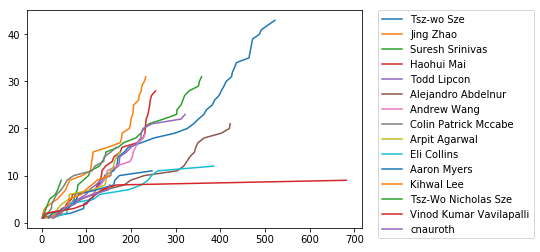

In [700]:
data= dF.groupby('author')['implicated'].nunique()
authorDf = pd.DataFrame(data)
topBugyContributers= authorDf.implicated.nlargest(15)
tempBuggy=[]
for author in topBugyContributers.index:
    tempBuggy= experienceCommits.loc[(experienceCommits['name']==author) & (experienceCommits["buggy"]==1)]
    tempDf = pd.DataFrame(tempBuggy['buggy'].cumsum())
#     tempBuggy[['cumBuggy']]=0
    tempBuggy[['cumBuggy']]= tempDf
    print("author name", author)
    pt.plot(tempBuggy['experience'], tempBuggy['cumBuggy'], label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    

[ 0.  5. 10. 15. 20. 25. 30. 35.] <a list of 8 Text yticklabel objects>


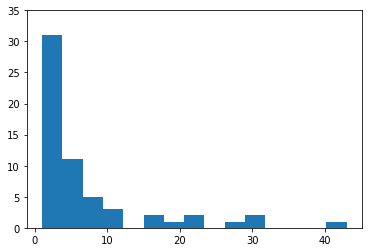

In [701]:
import math
authorDf.implicated.hist(bins=15, grid=False)
locs, label= pt.yticks()
print(locs, label)
yint=[]
for each in locs:
    yint.append(int(each))
pt.yticks(yint)


pt.savefig('histDefects.pdf', bbox_inches="tight")

In [751]:
topContributors= experienceCommits.groupby('name')['commits']
topContributors=topContributors.nunique().nlargest(5)
# topContributors.columns=['somethingelse']
# topContributors
# tempBuggy= dF.loc[dF['author'].isin(topContributors.index)]
# tempBuggy.groupby('author')['implicated'].nunique().nsmallest(2)


author
Arun Murthy                5
Vinod Kumar Vavilapalli    9
Name: implicated, dtype: int64

author name Vinod Kumar Vavilapalli
author name Tsz-wo Sze
author name Alejandro Abdelnur
author name Eli Collins
author name Arun Murthy


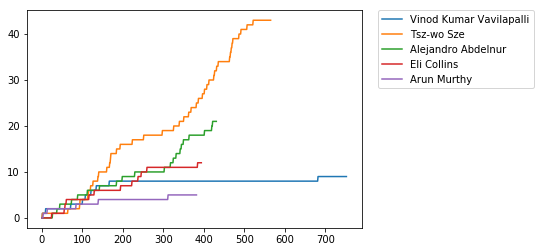

In [703]:
tempBuggy=[]
for author in topContributors.index:
    tempBuggy= experienceCommits.loc[(experienceCommits['name']==author)]
    tempDf= pd.DataFrame(tempBuggy['buggy'].cumsum())
    # tempDf = pd.DataFrame(tempBuggy['buggy'].cumsum())
    # tempBuggy[['cumBuggy']]=0
    tempBuggy[['cumBuggy']]= tempDf
    print("author name", author)
    pt.plot(tempBuggy['experience'], tempBuggy['cumBuggy'], label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

author name Tsz-wo Sze
author name Jing Zhao
author name Suresh Srinivas
author name Haohui Mai
author name Todd Lipcon


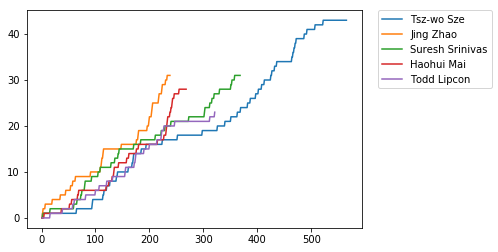

In [704]:
data= dF.groupby('author')['implicated'].nunique()
authorDf = pd.DataFrame(data)
topBugyContributers= authorDf.implicated.nlargest(5)
tempBuggy=[]
for author in topBugyContributers.index:
    tempBuggy= experienceCommits.loc[(experienceCommits['name']==author)]
    tempDf= pd.DataFrame(tempBuggy['buggy'].cumsum())
    # tempDf = pd.DataFrame(tempBuggy['buggy'].cumsum())
    # tempBuggy[['cumBuggy']]=0
    tempBuggy[['cumBuggy']]= tempDf
    print("author name", author)
    pt.plot(tempBuggy['experience'], tempBuggy['cumBuggy'], label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

author name Allen Wittenauer
author name Arun Suresh
author name Benoy Antony
author name Christopher Douglas
author name Dongming Liang


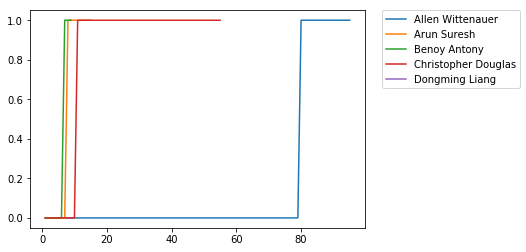

In [706]:
data= dF.groupby('author')['implicated'].nunique()
authorDf = pd.DataFrame(data)
topBugyContributers= authorDf.implicated.nsmallest(5)
tempBuggy=[]
for author in topBugyContributers.index:
    tempBuggy= experienceCommits.loc[(experienceCommits['name']==author)]
    tempDf= pd.DataFrame(tempBuggy['buggy'].cumsum())
    # tempDf = pd.DataFrame(tempBuggy['buggy'].cumsum())
    # tempBuggy[['cumBuggy']]=0
    tempBuggy[['cumBuggy']]= tempDf
    print("author name", author)
    pt.plot(tempBuggy['experience'], tempBuggy['cumBuggy'], label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

author name Robert Joseph Evans
author name Arun Murthy
author name Vinod Kumar Vavilapalli
author name Aaron Myers
author name Eli Collins


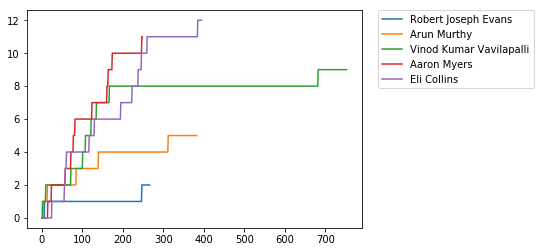

In [752]:
topContributors= experienceCommits.groupby('name')['commits']
topContributors=topContributors.nunique().nlargest(10)
topContributors.columns=['somethingelse']
topContributors
tempBuggy= dF.loc[dF['author'].isin(topContributors.index)]
bottomBuggyContributor = tempBuggy.groupby('author')['implicated'].nunique().nsmallest(5)

tempBuggy=[]
for author in bottomBuggyContributor.index:
    tempBuggy= experienceCommits.loc[(experienceCommits['name']==author)]
    tempDf= pd.DataFrame(tempBuggy['buggy'].cumsum())
    # tempDf = pd.DataFrame(tempBuggy['buggy'].cumsum())
    # tempBuggy[['cumBuggy']]=0
    tempBuggy[['cumBuggy']]= tempDf
    print("author name", author)
    pt.plot(tempBuggy['experience'], tempBuggy['cumBuggy'], label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)